In [1]:
## jupyter notebook to simulate the range of the nuclear recoils in a given decay chain

import numpy as np
import matplotlib.pyplot as plt
import alpha_recoil_sim as ar
import importlib

In [5]:
## make dictionary containing decay chain information for a given list of isotopes
path = "/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/Sphere_Recoils_MC"

iso_list = ['Ac-225', 'Pb-212', 'At-211', 'Th-227', 'Ra-223']

iso_dict = {}

for iso in iso_list:
    ciso = iso[:2].lower()
    cA = iso[-3:]
    iso_dict[iso] = ar.parse_decay_chain(path + "/decay_data/" + ciso + "_" + cA + "_decay_chain.txt")

{'Ac-225': {'Ac-225_t12': 864000.0, 'Ac-225_decays': array([[5.070e-01, 5.830e+03],
       [1.810e-01, 5.793e+03],
       [8.600e-02, 5.791e+03],
       [9.300e-02, 5.732e+03],
       [3.100e-02, 5.724e+03],
       [1.020e-01, 5.637e+03]]), 'Ac-225_daughters': ['Fr-221', 'Fr-221', 'Fr-221', 'Fr-221', 'Fr-221', 'Fr-221'], 'Fr-221_t12': 286.1, 'Fr-221_decays': array([[8.330e-01, 6.341e+03],
       [1.400e-02, 6.242e+03],
       [1.530e-01, 6.126e+03]]), 'Fr-221_daughters': ['At-217', 'At-217', 'At-217'], 'At-217_t12': 0.0323, 'At-217_decays': array([[1.000e+00, 7.067e+03]]), 'At-217_daughters': ['Bi-213'], 'Bi-213_t12': 2736.0, 'Bi-213_decays': array([[1.959e-02, 5.875e+03],
       [1.810e-03, 5.558e+03],
       [9.786e-01, 0.000e+00]]), 'Bi-213_daughters': ['Tl-209', 'Tl-209', 'Po-213'], 'Tl-209_t12': 129.60000000000002, 'Tl-209_decays': array([[1., 0.]]), 'Tl-209_daughters': ['Pb-209'], 'Po-213_t12': 3.7e-06, 'Po-213_decays': array([[1.000e+00, 8.376e+03]]), 'Po-213_daughters': ['Pb-20

0.49917


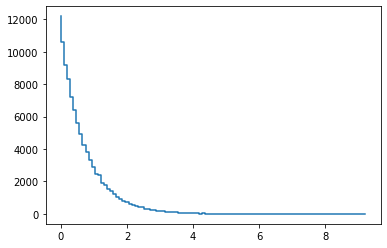

In [9]:
importlib.reload(ar)

nmc = 100000
t = []
for n in range(nmc):
    t.append(ar.get_random_decay_time(0.5))
t = np.array(t)

h, be = np.histogram(t, bins =100)

plt.figure()
plt.step(be[:-1], h, where='pre')

print(np.sum( t <= 0.5)/len(t))

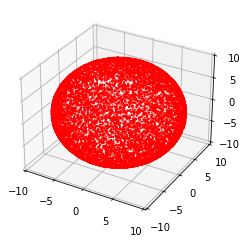

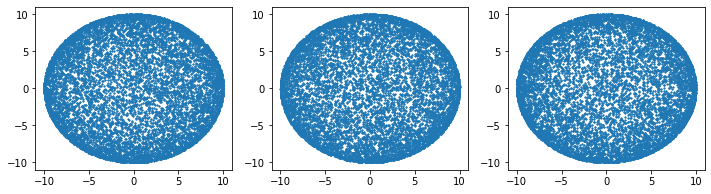

In [4]:
importlib.reload(ar)


points_x = np.linspace(10,10, 2)
points_y = np.zeros_like(points_x)
points_z = np.zeros_like(points_x)

points = np.vstack((points_x, points_y, points_z)).T

nmc = 10000

for i in range(nmc):
    random_angles = ar.random_angle_on_sphere()

    rp = ar.rotate_3d_data(points, random_angles)

    if(i==0):
        rotated_points = rp
    else:
        rotated_points = np.vstack((rotated_points, rp))
#or idx in range(len(points[:,0])):
#   rotated_points[idx, :] = ar.rotate_3d_data(points[idx, :], )

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the scatter plot with x, y, and z values
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c='k')
ax.scatter(rotated_points[:,0], rotated_points[:,1], rotated_points[:,2], s=1, c='r')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

def update(frame):
    # Rotate the sphere by a small angle
    ax.view_init(30, frame * 2)

# Set up the animation
#ani = animation.FuncAnimation(fig, update, frames=180, interval=50, blit=False)

#plt.show()

plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(rotated_points[:,0], rotated_points[:,1], s=1)

plt.subplot(1,3,2)
plt.scatter(rotated_points[:,0], rotated_points[:,2], s=1)

plt.subplot(1,3,3)
plt.scatter(rotated_points[:,1], rotated_points[:,2], s=1)

plt.show()

In [7]:
import pickle

data_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/SRIM_Data/'

with open(data_path + 'SRIM_MC_events.pkl', 'rb') as f:
    MC_dict = pickle.load(f)

In [14]:
importlib.reload(ar)


sphere_dict = {"inner_radius": 20, "outer_shell_thick": 20, "inner_material": "SiO2", "shell_material": "Au"}

ar.sim_N_events(1, "Ac-225", iso_dict, sphere_dict, MC_dict)

5 6
Starting point:  [102.95111111  30.83067746  -2.25805816  -0.35726129]
Decay energy :  102.95111111111112
[[ 1.1918e+02  2.3514e+01 -1.4498e+00  4.3900e-02]
 [ 1.1867e+02  2.7829e+01 -1.8996e+00 -2.0830e-01]
 [ 9.6126e+01  3.2134e+01 -2.4137e+00 -4.2194e-01]]
27 28
Starting point:  [101.90222222 260.36098301   3.97446691  17.51389455]
Decay energy :  101.90222222222222
[[112.23   252.55     4.568   15.808 ]
 [111.88   256.72     4.2578  16.732 ]
 [ 89.025  265.06     3.6088  18.523 ]]
40 41
Starting point:  [103.64444444 448.22236075  -0.80264293 -37.5311394 ]
Decay energy :  103.64444444444445
[[ 1.1374e+02  4.2532e+02 -3.8437e-01 -3.4720e+01]
 [ 1.1268e+02  4.3810e+02 -5.8456e-01 -3.6342e+01]
 [ 1.0129e+02  4.5086e+02 -8.5947e-01 -3.7841e+01]]
29 30
Starting point:  [103.64444444 375.37076072 -34.41074101  55.13260832]
Decay energy :  103.64444444444445
[[109.55  357.3   -32.492  52.667]
 [104.47  374.08  -34.199  54.994]
 [ 99.187 382.34  -35.554  55.881]]
17 18
Starting point: 

KeyError: 0